In [132]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore,ttest_ind
import matplotlib.pyplot as plt
import statsmodels.stats.api as sm
import  cv2
from sklearn.cluster import KMeans

In [88]:
file=pd.read_csv("heart_disease_uci.csv")
file.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [89]:
file=file.drop_duplicates()
file.shape


(920, 16)

In [90]:
file.isnull().sum()



id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [91]:
file.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

In [92]:
for i in file.columns:
  if any(file[i].isnull()):
        if file[i].dtype=='int64' or file[i].dtype=='float64' :
                 file[i].fillna(file[i].mean(),inplace=True)
        if file[i].dtype=='object':
                 file[i].fillna(file[i].mode().iloc[0],inplace=True)



In [93]:
file.isnull().sum()


id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

#Removing Outliers:

In [94]:
def remove_outliers(data, threshold=3):
 z_scores=zscore(data)
 outlier= np.abs(z_scores) > threshold
 cleaned_data = data[~outlier]
 return cleaned_data


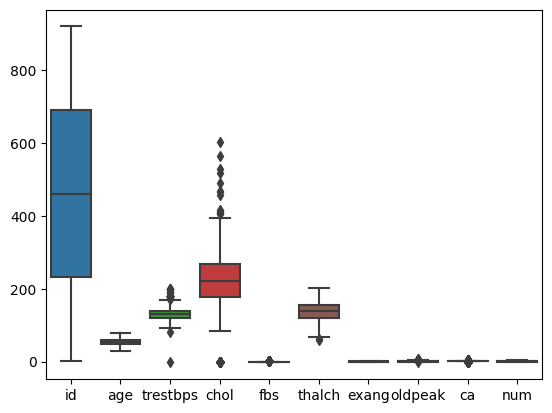

,id,age,trestbps,chol,thalch,oldpeak,ca,num
0,1,63,145.000000,233.0,150.000000,2.300000,0.000000,0
1,2,67,160.000000,286.0,108.000000,1.500000,NaN,2
2,3,67,120.000000,229.0,129.000000,2.600000,2.000000,1
3,4,37,130.000000,250.0,187.000000,3.500000,0.000000,0
4,5,41,130.000000,204.0,172.000000,1.400000,0.000000,0
...,...,...,...,...,...,...,...,...
915,916,54,127.000000,333.0,154.000000,0.000000,0.676375,1
916,917,62,132.132404,139.0,137.545665,0.878788,0.676375,0
917,918,55,122.000000,223.0,100.000000,0.000000,0.676375,2
918,919,58,132.132404,385.0,137.545665,0.878788,0.676375,0


In [95]:
sns.boxplot(data=file)
plt.show(  )
remove_outliers(file.select_dtypes(include=['int','float']),threshold=3)

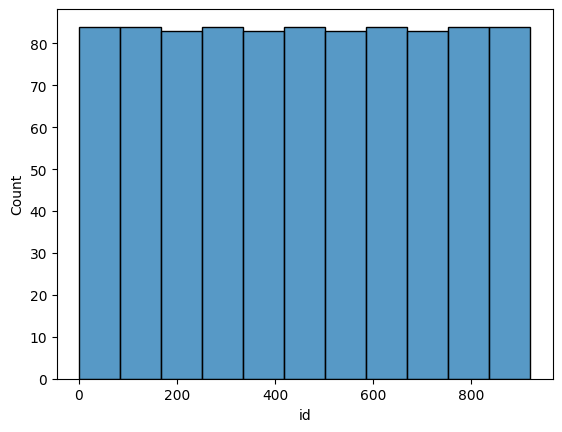

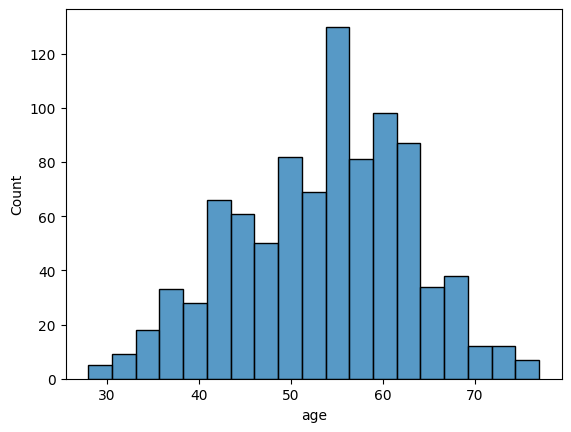

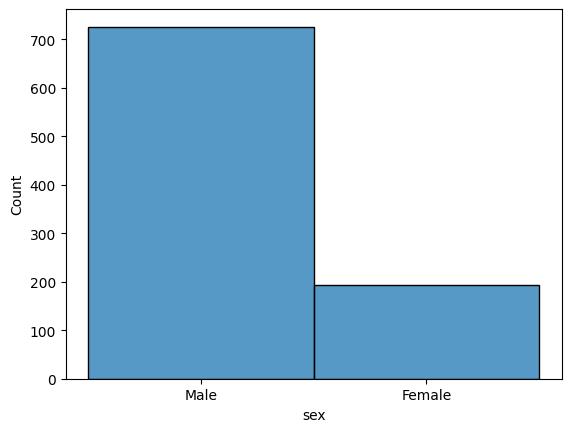

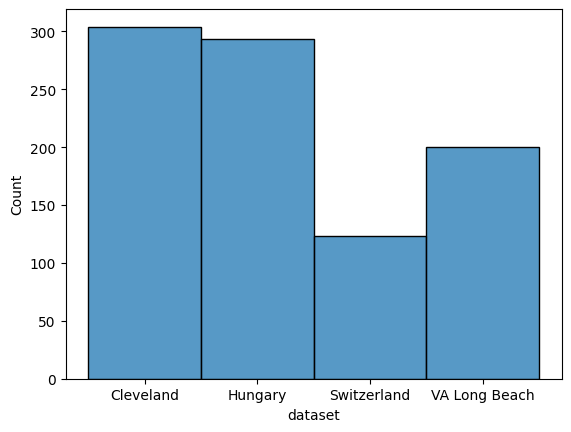

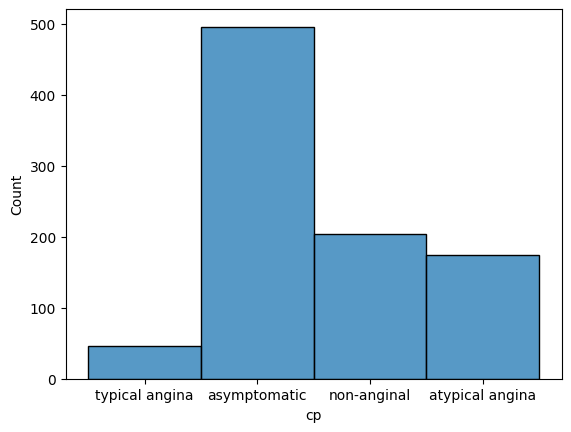

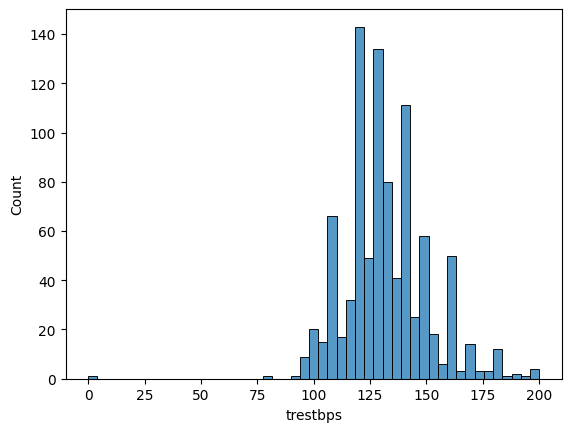

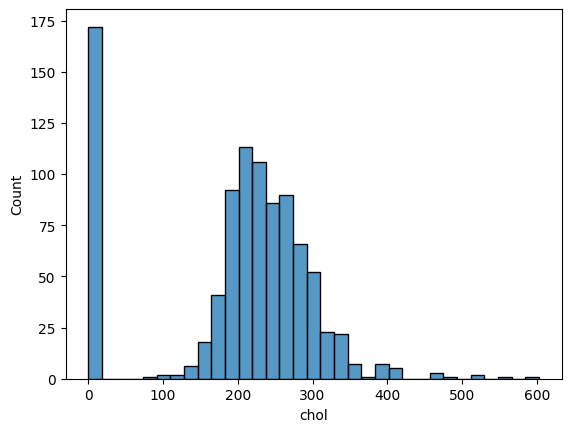

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


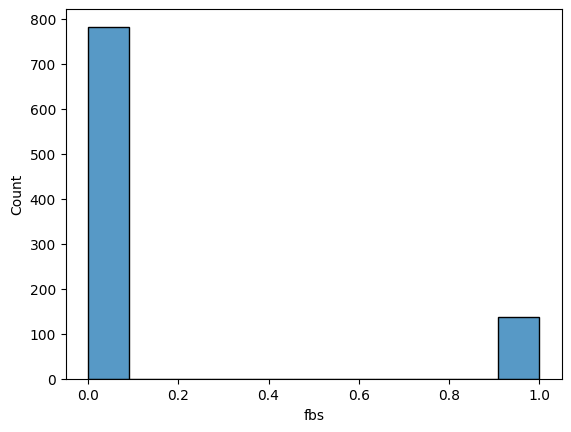

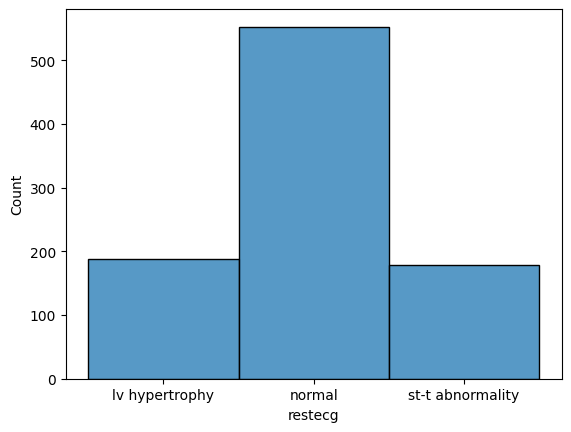

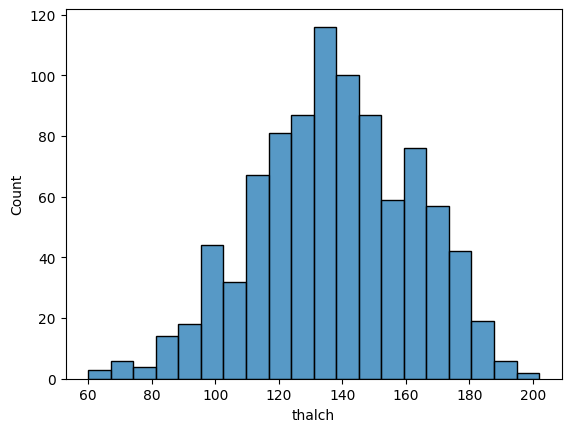

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


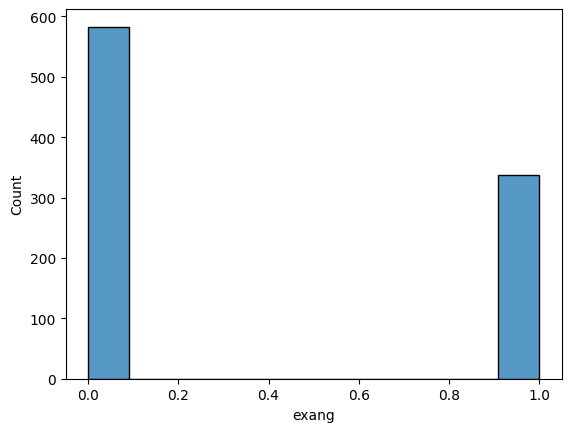

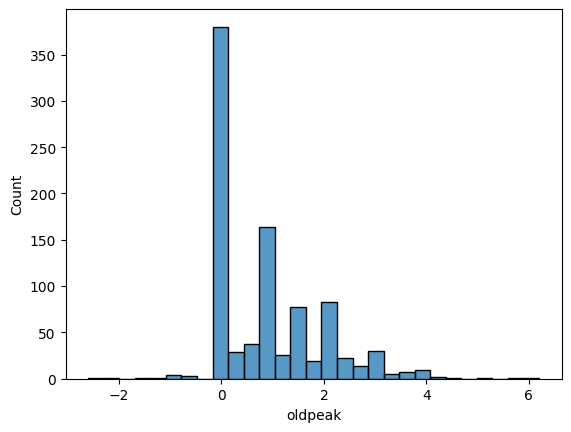

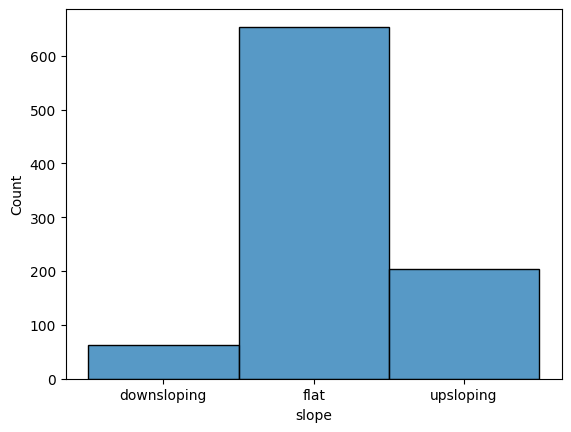

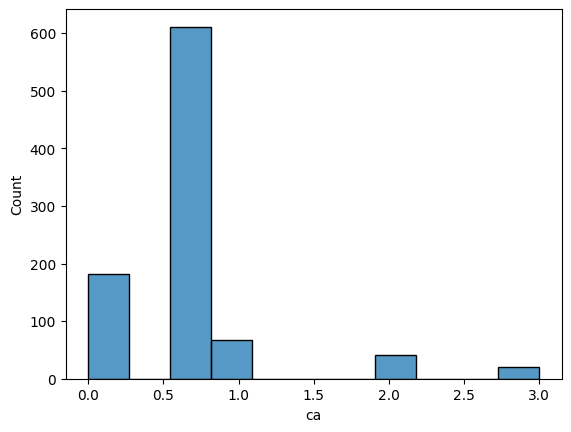

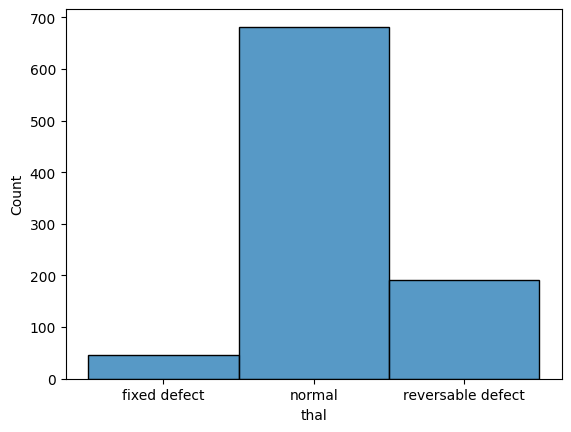

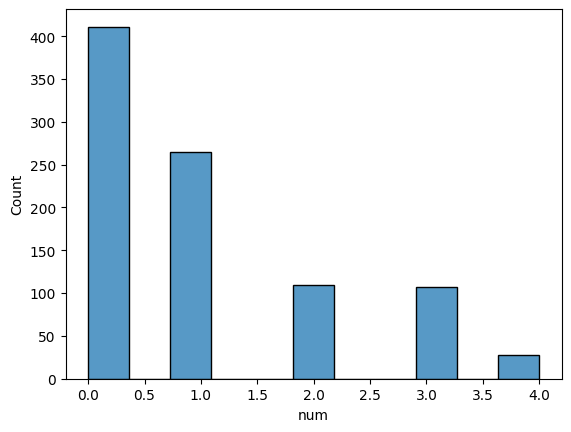

In [96]:
for i in file.columns:
  sns.histplot(file[i])
  plt.show()

<ipython-input-97-5c4c79bf2f5f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=file.corr()


<Axes: >

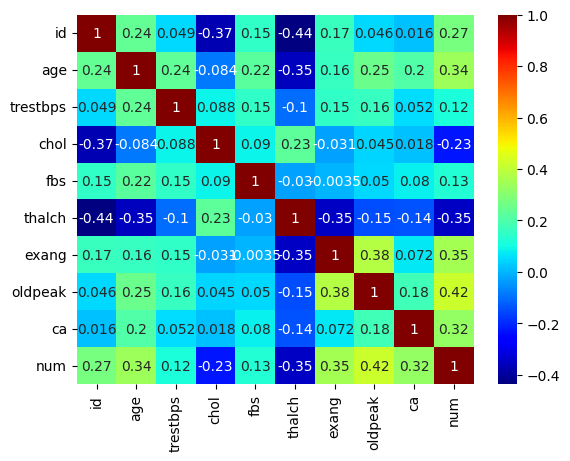

In [97]:
correlation=file.corr()
sns.heatmap(correlation,annot=True,cmap='jet' )

In [98]:
chol_with_disease = file[file['num'] > 0]['chol']
chol_without_disease = file[file['num'] == 0]['chol']
t_statistic, p_value = ttest_ind(chol_with_disease, chol_without_disease)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in cholesterol levels between patients with heart disease and without heart disease.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in cholesterol levels between patients with heart disease and without heart disease.")


Reject the null hypothesis. There is a significant difference in cholesterol levels between patients with heart disease and without heart disease.


In [99]:
confident_interval_with_cholesterol = sm.DescrStatsW(chol_with_disease).tconfint_mean()
confident_interval_without_cholesterol = sm.DescrStatsW(chol_without_disease).tconfint_mean()
print("Confidence Interval for Cholesterol with heart disease= ", confident_interval_with_cholesterol)
print("Confidence Interval for Cholesterol without heart disease= ", confident_interval_without_cholesterol)

Confidence Interval for Cholesterol with heart disease=  (165.98214381850937, 187.9566919687801)
Confidence Interval for Cholesterol without heart disease=  (219.37078787273725, 233.77994888879255)


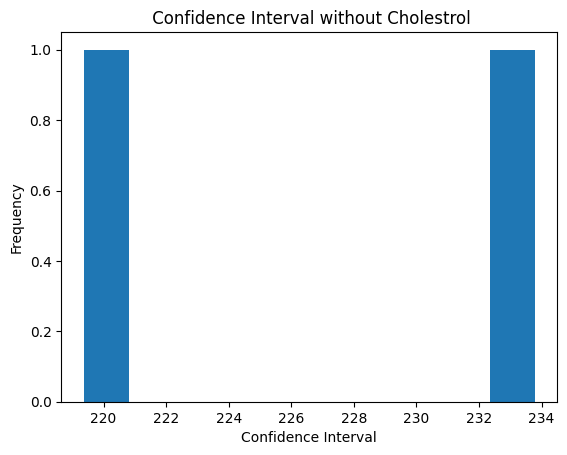

In [100]:
plt.hist(confident_interval_without_cholesterol,bins=10)
plt.xlabel("Confidence Interval")
plt.ylabel("Frequency")
plt.title(" Confidence Interval without Cholestrol")
plt.show()

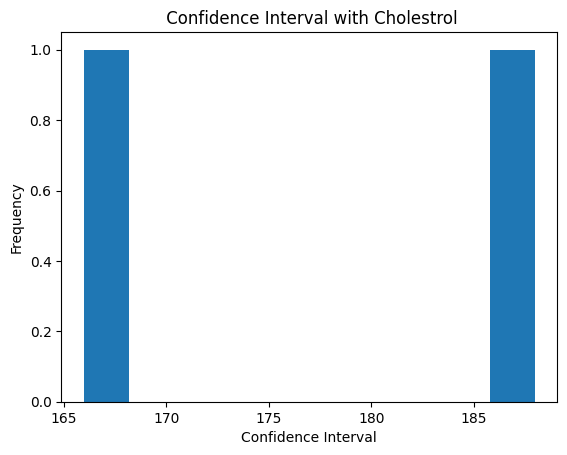

In [101]:
plt.hist(confident_interval_with_cholesterol,bins=10)
plt.xlabel("Confidence Interval")
plt.ylabel("Frequency")
plt.title(" Confidence Interval with Cholestrol")
plt.show()

In [102]:
BP_with_disease = file[file['num'] > 0]['trestbps']
BP_without_disease = file[file['num'] == 0]['trestbps']
t_statistic, p_value = ttest_ind(BP_with_disease, BP_without_disease)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in blood pressure levels between patients with and without heart disease.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in blood pressure levels between patients with and without heart disease.")

Reject the null hypothesis. There is a significant difference in blood pressure levels between patients with and without heart disease.


In [103]:
confident_interval_with_BP = sm.DescrStatsW(BP_with_disease).tconfint_mean()
confident_interval_without_BP = sm.DescrStatsW(BP_without_disease ).tconfint_mean()
print("Confidence Interval for Cholesterol with heart disease= ",confident_interval_with_BP)
print("Confidence Interval for Cholesterol without heart disease= ",confident_interval_without_BP)

Confidence Interval for Cholesterol with heart disease=  (132.11707570160883, 135.55743810218763)
Confidence Interval for Cholesterol without heart disease=  (128.4249918770566, 131.6170912549321)


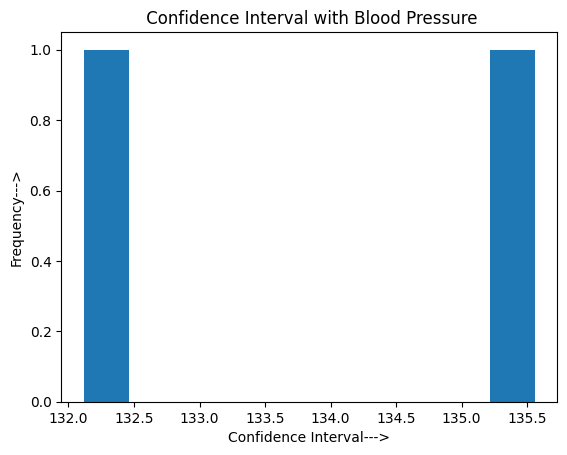

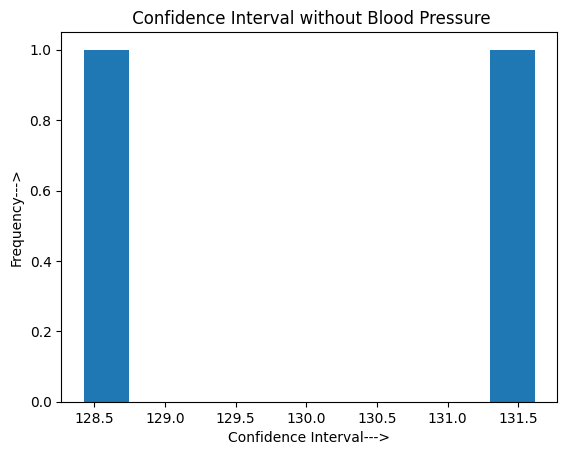

In [104]:
plt.hist(confident_interval_with_BP,bins=10)
plt.xlabel("Confidence Interval--->")
plt.ylabel("Frequency--->")
plt.title(" Confidence Interval with Blood Pressure")
plt.show()
plt.hist(confident_interval_without_BP,bins=10)
plt.xlabel("Confidence Interval--->")
plt.ylabel("Frequency--->")
plt.title(" Confidence Interval without Blood Pressure")
plt.show()


TASK#2:

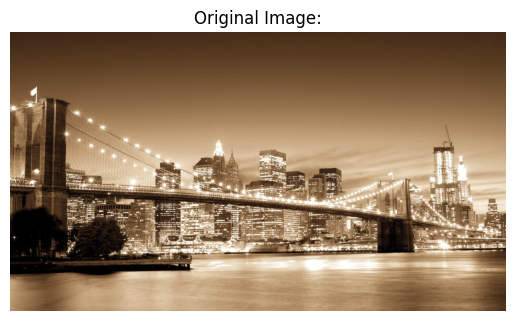

(1080, 1920, 3)

In [117]:
image_file=cv2.imread("image.jpg")
plt.title("Original Image:")
plt.imshow(image_file)
plt.axis('off')
plt.show()
image_file.shape

#Interpretation of image_file.shape:
---
->Here 1080 represents the heigth of image pixels.

->And 1920 represents the length/width of image pixels(horizontally)

->3=RGB color.
***

#Converting Into 2D shape:

In [120]:
two_D_image_file=image_file.reshape(-1,3)
two_D_image_file.shape

(2073600, 3)

#Defining values in K:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


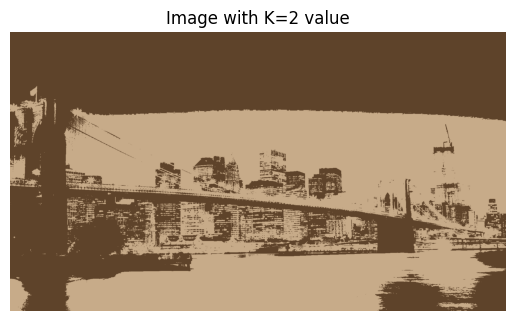

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


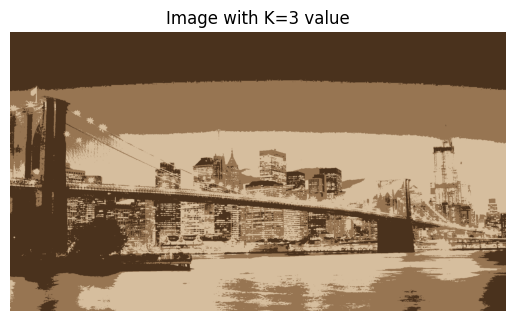

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


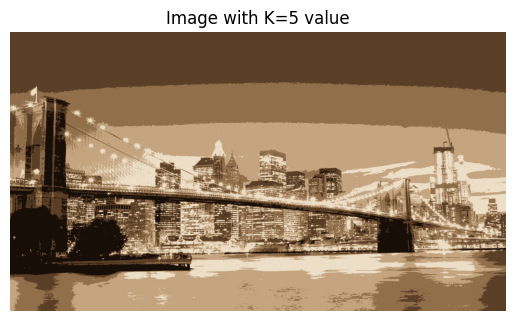

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


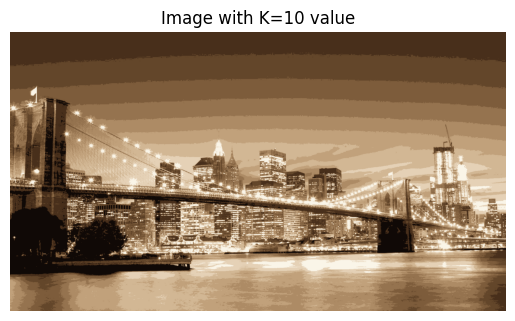

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


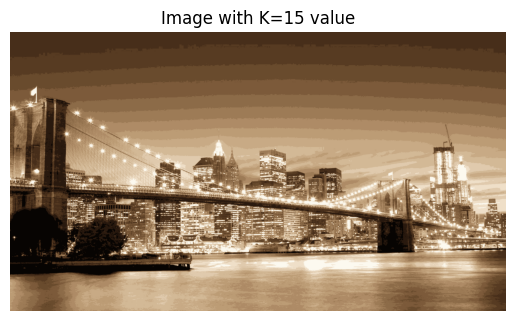

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


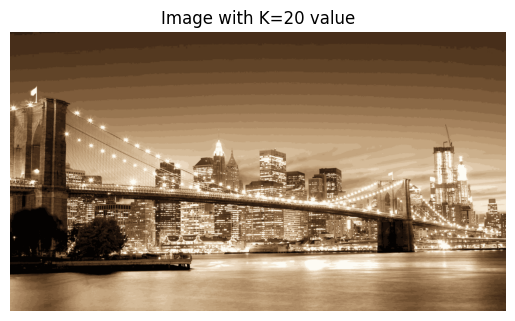

In [130]:
K=[2,3,5,10,15,20]
for i in K:
  kmeans=KMeans(n_clusters=i,random_state=0)
  kmeans.fit(two_D_image_file)
  labels=kmeans.labels_
  centroid_value=kmeans.cluster_centers_[labels]
  original_image_shape=centroid_value.reshape(image_file.shape)
  plt.title('Image with K=' + str(i) + ' value')
  plt.imshow(original_image_shape.astype(np.uint8))
  plt.savefig('Image with cluster K='+str(i)+' .jpg',bbox_inches='tight', transparent=True,pad_inches=0)
  plt.show()
  plt.show()